# Проект

# Выбор лучшей модели машинного обучения для уменьшения потребления электроэнергии на этапе обработки стали
___

# Описание проекта

Требуется подготовить прототип модели машинного обучения, чтобы уменьшить потребление электроэнергии на этапе обработки стали.  Это поможет оптимизировать производственные расходы. Заказчик - металлургический комбинат. 

Цель проекта: Модель должна предсказывать температуру стали, т.е. в каком количестве добавлять примеси, продувать газом и в каком количестве добавлять проволки. 
___

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.


### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. 

Стадии процесса:

1. Расплавленную сталь заливают в ковш
2. Сталь подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. **`data_arc`**
3. Из сплава выводится сера (десульфурация)
4. Добавлением примесей корректируется химический состав и отбираются пробы. **`data_bulk`** и **`data_bulk_time`**
5. Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. **`data_temp`**
6. Потом температуру на несколько минут повышают
7. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»). **`data_wire`** и **`data_wire_time`**
8. Продувают сплав инертным газом **`data_gas`**
9. Затем сплав перемешивают и снова проводят измерения. **`data_temp`**
10. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
11. Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Признаки

Целевой признак - ` последняя измеренная температура, после которой мы остановили процесс плавки` 


Признаки взять в файлах:  
`data_arc.csv — данные об электродах`  
`data_bulk.csv — данные о подаче сыпучих материалов (объём)`  
`data_bulk_time.csv — данные о подаче сыпучих материалов (время)`  
`data_gas.csv — данные о продувке сплава газом` 
`data_wire.csv — данные о проволочных материалах (объём)`  
`data_wire_time.csv — данные о проволочных материалах (время)`  
`data_temp - результаты измерения температуры` - только первая температура, измеренная до процесса

### Метрики
целевая метрика MAE (6.8 гр - макс проходной результат, <6 - хороший результат)  

random_state = 13022023

# План работы

План работы
1. Загрузить библиотеки.


2. Подготовка данных  
    2.1. Открыть файлы и изучить данные.   
    2.2. Сделать выводы о проблемах с данными.  
      

3. Предобработка данных  
    3.1. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам.  
    3.2. Сгруппировать данные по партии key, с объединением датасетов в один. Группировать только те партии, где есть все данные  
    3.3. Проверить корреляцию между признаками. Удалить лишние при необходимости.  
    3.4. Разделить выборку на выборки train 75% и test 25%.   
    3.5. Масштабировать признаки.  
         

4. Построить модель  
    4.1. Обучить разные модели и оценить их качество кросс-валидацией.  
    4.2. Выбрать лучшую модель и проверить её на тестовой выборке.  
    4.3. Сравнить с константной моделью.  
        
    
5. Общий вывод  


6. Отчёт

___

# 1. Загрузка библиотек

In [1]:
!pip3 install catboost
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

#import grafics
import matplotlib.pyplot as plt
import pylab as pl


#import sklearn
from sklearn.preprocessing import StandardScaler #for Standard Scaling
from sklearn.metrics import mean_absolute_error #for MAE
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

#to display all rows and columns
from IPython.display import display, HTML 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

print('Importing libraries - OK')

Defaulting to user installation because normal site-packages is not writeable
Importing libraries - OK


Необходимые библиотеки загружены.

# 2. Подготовка данных

2.1. Открыть и изучить файлы.  

In [2]:
try:
    df_arc_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_arc.csv')
    df_bulk_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_bulk.csv')
    df_bulk_time_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_bulk_time.csv')
    df_gas_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_gas.csv')
    df_temp_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_temp.csv')
    df_wire_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_wire.csv')
    df_wire_time_raw = pd.read_csv('C:\\Users\\bessonov\\YandexDisk\\Python_практикум\\Projects\\Reduction of energy cons\\final_steel\\final_steel\\data_wire_time.csv')
except:
    df_arc_raw = pd.read_csv('/data_arc.csv')
    df_bulk_raw = pd.read_csv('/data_bulk.csv')
    df_bulk_time_raw = pd.read_csv('/data_bulk_time.csv')
    df_gas_raw = pd.read_csv('/data_gas.csv')
    df_temp_raw = pd.read_csv('/data_temp.csv')
    df_wire_raw = pd.read_csv('/data_wire.csv')
    df_wire_time_raw = pd.read_csv('/data_wire_time.csv')

Данные загружены, изучим каждый датасет

In [3]:
print('df_arc_raw')
print()
print(df_arc_raw.shape)
print()
print(df_arc_raw.info())
display(df_arc_raw.head(10))
print()
print('Описание данных')
print(df_arc_raw['Активная мощность'].describe())
print(df_arc_raw['Реактивная мощность'].describe())

df_arc_raw

(14876, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494



Описание данных
count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64
count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64


Проверим сколько отрицательных значений в колонке Реактивная мощность

In [4]:
print(df_arc_raw['Реактивная мощность'].sort_values().head())

9780   -715.504924
5596      0.020806
2419      0.021154
4914      0.022485
4633      0.022983
Name: Реактивная мощность, dtype: float64


Строим график распределения Активной и Реактивной мощностей

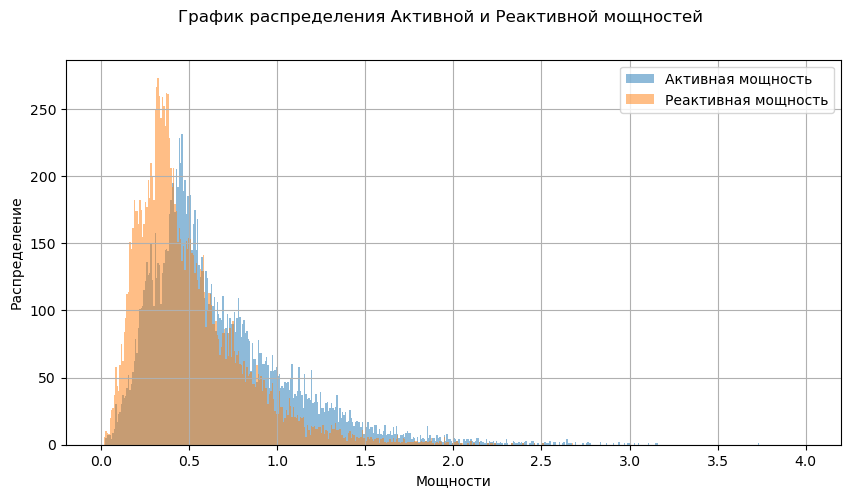

In [5]:
df_arc_raw['Активная мощность'].hist(bins=500, range=(0, 4), figsize=(10, 5), legend=True, alpha=0.5);
df_arc_raw['Реактивная мощность'].hist(bins=500, range=(0, 4), legend=True, alpha=0.5);

pl.suptitle('График распределения Активной и Реактивной мощностей');
plt.ylabel('Распределение');
plt.xlabel('Мощности');

Проверим адекватность данных о времени нагрева

In [6]:
#изменим формат на DateTime
df_arc_raw['Конец нагрева дугой'] = pd.to_datetime(df_arc_raw['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
df_arc_raw['Начало нагрева дугой'] = pd.to_datetime(df_arc_raw['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

In [7]:
#Вычислим длительность нагрева и проанализируем
df_arc_raw['period_heating'] = df_arc_raw['Конец нагрева дугой'] - df_arc_raw['Начало нагрева дугой']
print('Описание данных')
print(df_arc_raw['period_heating'].describe())
print()
print('Посмотрим макс длительные нагревы')
print(df_arc_raw['period_heating'].sort_values().tail())

Описание данных
count                        14876
mean     0 days 00:02:51.670946490
std      0 days 00:01:38.186802680
min                0 days 00:00:11
25%                0 days 00:01:47
50%                0 days 00:02:27
75%                0 days 00:03:34
max                0 days 00:15:07
Name: period_heating, dtype: object

Посмотрим макс длительные нагревы
4654    0 days 00:12:05
2939    0 days 00:12:26
7433    0 days 00:13:00
12424   0 days 00:13:46
7799    0 days 00:15:07
Name: period_heating, dtype: timedelta64[ns]


___

In [8]:
print('df_bulk_raw')
print()
print(df_bulk_raw.shape)
print()
print(df_bulk_raw.info())
display(df_bulk_raw.head())

df_bulk_raw

(3129, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


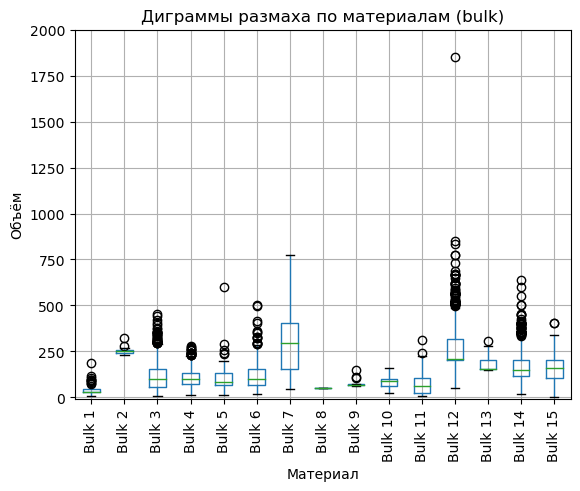

In [9]:
plt.ylim(-10, 2000)
plt.xlabel('Материал')
plt.ylabel('Объём')
plt.title('Диграммы размаха по материалам (bulk)')
df_bulk_raw.drop('key', axis=1).boxplot(rot=90);

___

In [10]:
print('df_bulk_time_raw')
print()
print(df_bulk_time_raw.shape)
print()
print(df_bulk_time_raw.info())
display(df_bulk_time_raw.head())

df_bulk_time_raw

(3129, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


In [11]:
print('df_gas_raw')
print()
print(df_gas_raw.shape)
print()
print(df_gas_raw.info())
display(df_gas_raw.head())
print()
print('Описание данных')
df_gas_raw['Газ 1'].describe()

df_gas_raw

(3239, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Описание данных


count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64

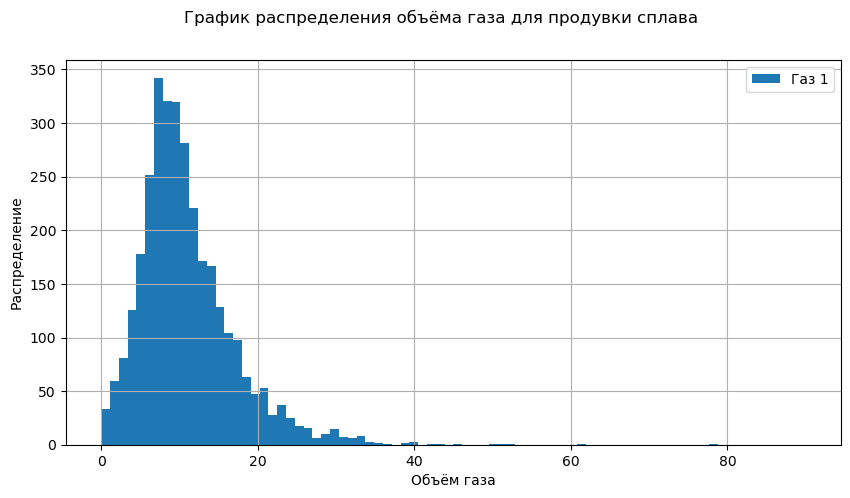

In [12]:
df_gas_raw['Газ 1'].hist(bins=80, range=(0, 90), figsize=(10, 5), legend=True);

pl.suptitle('График распределения объёма газа для продувки сплава');
plt.ylabel('Распределение');
plt.xlabel('Объём газа');

In [13]:
print('df_temp_raw')
print()
print(df_temp_raw.shape)
print()
print(df_temp_raw.info())
display(df_temp_raw.head())
print()
print('Описание данных')
df_temp_raw['Температура'].describe()

df_temp_raw

(15907, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



Описание данных


count    13006.000000
mean      1591.840920
std         21.375851
min       1191.000000
25%       1581.000000
50%       1591.000000
75%       1601.000000
max       1705.000000
Name: Температура, dtype: float64

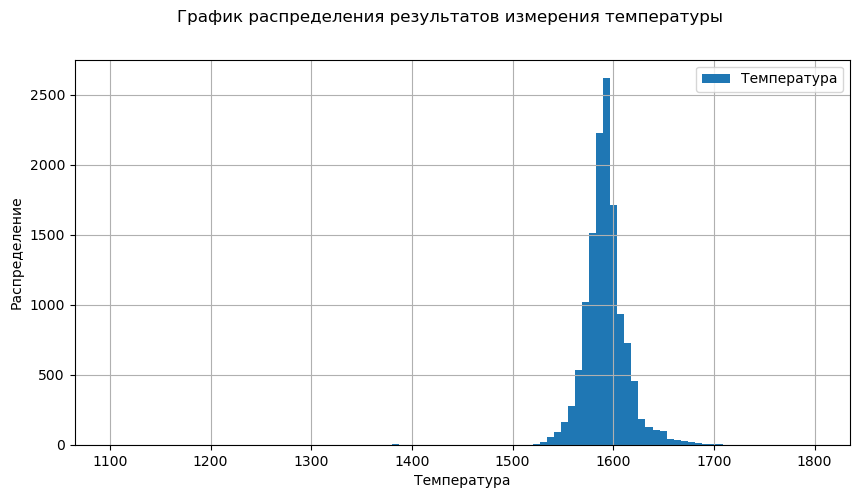

In [14]:
df_temp_raw['Температура'].hist(bins=100, range=(1100, 1800), figsize=(10, 5), legend=True);

pl.suptitle('График распределения результатов измерения температуры');
plt.ylabel('Распределение');
plt.xlabel('Температура');

In [15]:
print('df_wire_raw')
print()
print(df_wire_raw.shape)
print()
print(df_wire_raw.info())
display(df_wire_raw.head())

df_wire_raw

(3081, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


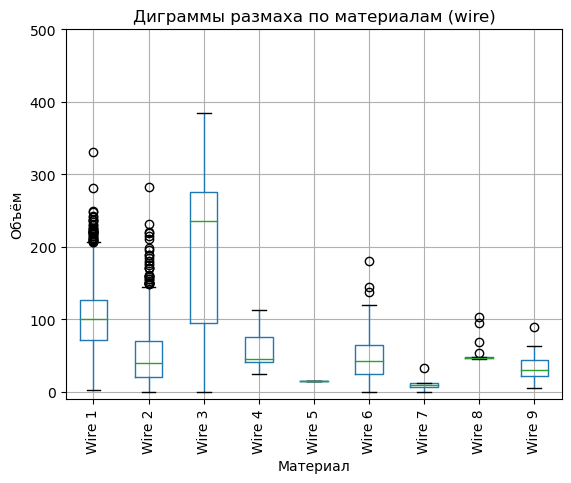

In [16]:
plt.ylim(-10, 500)
plt.xlabel('Материал')
plt.ylabel('Объём')
plt.title('Диграммы размаха по материалам (wire)')
df_wire_raw.drop('key', axis=1).boxplot(rot=90);

In [17]:
print('df_wire_time_raw')
print()
print(df_wire_time_raw.shape)
print()
print(df_wire_time_raw.info())
display(df_wire_time_raw.head())

df_wire_time_raw

(3081, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 Выводы предварительного исследования данных


**df_arc (нагрев электродов).**  

*Вывод*: 
- Пропусков в данных нет. 
- В Реактивная мощность имеется одно сильно отрицательное значение. Можно удалить или восстановить по корелляции с активной мощностью. Удалить необходимо только выброс в Реактивной мощности и оставить партию, в которой был выброс. Однако, исходя из физического смысла активной и реактивной мощности для модели будет достаточно только активной мощности. Скорее всего, ошибка при получении данных. В остальном данные выглядят нормально.   
- Проверил длительность нагревов: макс по времени нагревали в течении 15 мин, в среднем (медиана) 2,5 минуты. Аномалий и ошибок не выявлено.  

*ToDo*:
- взять признак: Активная мощность. 
- получить новый признак: длительность нагрева. 
- получить новый признак: работу = длительность нагрева * мощность. 
- сгенерировать признаки, затем объеденить по key

**data_bulk (данные о подаче сыпучих материалов (объём)).**  

*Вывод*: 
- много пропусков, материал не использовался, заменить на 0
- есть материалы, которы использовались в менее 1% партий. Данные по этим материалам не презентабельны. ДЛя использования этих материалов в модели необходимо собрать бьольше данных. Удалить такие материалы.
- в Bulk 5 и 12 есть два сильных выброса. Скорее всего ошибка в данных - заменить на 0  

*ToDo*:  
- заменить NaN на 0
- удалить колонки с количеством использовния менее 1% от количества партий (<31) (Bulk 2, 7, 8, 9, 13)
- в Bulk 5 и 12 выбросы более 500 и 1750 соответсвенно заменить на 0
- взять признаки: объём материалов


**data_gas (объём инертного газа для продувки).**   

*Вывод*: 
- в среднем для продувки расходуется 11 м3 газа. Распределение объёмов выглядит нормальным. 
- на графике распределения заметны несколько значений более 40 м3.   

*ToDo* 
- после предобработки общего датасета проверить выбросы более 40. При необходимости обработать
- взять признаки: объём газа

**data_temp (результаты измерения температуры).**  

*Вывод*: 
- распределение выглядит нормальным.
- пристствуют значения ниже 1400 гр - низкие температуры ниже темп плавления стали - можно убрать всю партию
- в нескольких партий есть только входная температура - исключить, т.к. нет таргета.  

*ToDo* 
- удалить партии со значением ниже 1400 гр 
- удалить партии где есть начальная температура и нет конечной
- взять признак: первая температура, измеренная до процесса
- взять целевой признак: последняя измеренная температура в партии
 

**data_wire (данные о проволочных материалах (объём)).**

*Вывод*: 
- много пропусков, материал не использовался, заменить на 0
- есть материалы, которы использовались в менее 1% партий. Данные по этим материалам не презентабельны. Для использования этих материалов в модели необходимо собрать больше данных. Удалить такие материалы. (Wire 4 , 5 , 7 , 8 , 9)

*ToDo*:  
- заменить NaN на 0
- удалить колонки с количеством использовния менее 1% от количества партий (<31) (Wire 4 , 5 , 7 , 8 , 9)
- взять признаки: объём материалов


**data_wire_time (данные о проволочных материалах (время)) и data_bulk_time.**  

*Вывод*: учитывая, что время в разных датасетах рассинхронизированное, то не будем учитывать эти данные в модели.  

# 3. Предобработка данных  

## 3.1. Провести предобработку данных. 


### Обработка df_arc (нагрев электродов) в соответсвии с п.2.2.

In [18]:
df_arc = df_arc_raw

взять признак: Активная мощность. Расчитать медианную Активную мощность для каждой партии

In [19]:
df_arc_active_power = df_arc.groupby('key')['Активная мощность'].median()

получить новый признак: длительность нагрева. Расчитать для каждой партии.

In [20]:
df_arc_start = df_arc.groupby('key')['Начало нагрева дугой'].min()

In [21]:
df_arc_finish = df_arc.groupby('key')['Конец нагрева дугой'].max()

Получаем период нагрева партии в секундах

In [22]:
df_arc_heating_period = (df_arc_finish - df_arc_start).dt.total_seconds()

получить новый признак: работу = длительность нагрева * мощность.

In [23]:
df_arc['work'] = df_arc['Активная мощность'] * df_arc['period_heating'].dt.total_seconds()

In [24]:
df_arc.head(2)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,period_heating,work
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,0 days 00:03:48,222.541395
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0 days 00:03:05,149.037310


In [25]:
df_arc_work = df_arc.groupby('key')['work'].sum()

сгенерировать признаки, затем объеденить по key

In [26]:
features_arc = pd.concat([df_arc_active_power, df_arc_heating_period, df_arc_work], axis=1)
features_arc = features_arc.rename(columns={'Активная мощность': 'active_power', 0: 'heating_period', 1:'work'})

In [27]:
model_data = features_arc

In [28]:
model_data.head()

,active_power,heating_period,work
key,,,
1,0.805607,1583.0,1207.804249
2,0.659060,1144.0,733.816470
3,0.429355,1525.0,443.583327
4,0.781301,1093.0,670.663327
5,0.729026,1362.0,997.496095


### Обработка data_bulk (данные о подаче сыпучих материалов (объём)) в соответсвии с п.2.2.

In [29]:
df_bulk = df_bulk_raw

удалить колонки с количеством использовния менее 1% от количества партий (<31) (Bulk 2, 7, 8, 9, 13)

In [30]:
df_bulk = df_bulk.drop(columns=['Bulk 2', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 13'])

заменить NaN на 0

In [31]:
df_bulk = df_bulk.fillna(0)

в Bulk 5 и 12 выбросы более 500 и 1750 соответсвенно заменить на 0

In [32]:
df_bulk.loc[df_bulk['Bulk 5'] > 500, 'Bulk 5'] = 0

In [33]:
df_bulk.loc[df_bulk['Bulk 12'] > 1750, 'Bulk 12'] = 0

взять признаки: объём материалов

In [34]:
df_bulk.head(2)

,key,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15
0,1,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0
1,2,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0


In [35]:
model_data = model_data.merge(df_bulk, on='key', how='left')

In [36]:
model_data.head()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15
0,1,0.805607,1583.0,1207.804249,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0
1,2,0.659060,1144.0,733.816470,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0
2,3,0.429355,1525.0,443.583327,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0
3,4,0.781301,1093.0,670.663327,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0
4,5,0.729026,1362.0,997.496095,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0


### Обработка data_gas (объём инертного газа для продувки) в соответсвии с п.2.2.

In [37]:
df_gas = df_gas_raw

In [38]:
df_gas = df_gas.rename(columns={'Газ 1': 'gas'})

после предобработки общего датасета проверить выбросы более 40. При необходимости обработать

взять признаки: объём газа

In [39]:
model_data = model_data.merge(df_gas, on='key', how='left')

In [40]:
model_data.head()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas
0,1,0.805607,1583.0,1207.804249,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986
1,2,0.659060,1144.0,733.816470,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561
2,3,0.429355,1525.0,443.583327,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793
3,4,0.781301,1093.0,670.663327,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219
4,5,0.729026,1362.0,997.496095,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692


### Обработка data_temp (результаты измерения температуры) в соответсвии с п.2.2. 

In [41]:
df_temp = df_temp_raw

In [42]:
df_temp = df_temp.rename(columns={'Время замера':'temp_time', 'Температура':'temp'})
df_temp['temp_time'] = pd.to_datetime(df_temp['temp_time'], format='%Y-%m-%d %H:%M:%S')

Сгруппировать по партиям

Первая температура, измеренная до процесса

In [43]:
df_temp_start = df_temp.groupby('key')['temp_time'].min()
df_temp_start = df_temp_start.to_frame()
df_temp_start = df_temp_start.merge(df_temp, on='temp_time', how='left')
df_temp_start = df_temp_start.rename(columns={'temp_time': 'temp_time_start', 'temp':'temp_start' })

Последняя измеренная температура в партии

In [44]:
df_temp_finish = df_temp.groupby('key')['temp_time'].max()
df_temp_finish = df_temp_finish.to_frame()
df_temp_finish = df_temp_finish.merge(df_temp, on='temp_time', how='left')
df_temp_finish = df_temp_finish.rename(columns={'temp_time': 'temp_time_finish', 'temp':'temp_finish' })

удалить партии со значением ниже 1400 гр 

In [45]:
df_temp_start = df_temp_start.loc[df_temp_start['temp_start'] > 1400]
df_temp_finish = df_temp_finish.loc[df_temp_finish['temp_finish'] > 1400]

удалить партии где есть начальная температура и нет конечной

In [46]:
df_temp = df_temp_start.merge(df_temp_finish, on='key', how='left')
df_temp = df_temp.dropna(axis=0)

взять признак: первая температура, измеренная до процесса

In [47]:
model_data = model_data.merge(df_temp[['key','temp_start']], on='key', how='left')

взять целевой признак: последняя измеренная температура в партии

In [48]:
model_data = model_data.merge(df_temp[['key','temp_finish']], on='key', how='left')

In [49]:
model_data.head()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas,temp_start,temp_finish
0,1,0.805607,1583.0,1207.804249,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0
1,2,0.659060,1144.0,733.816470,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0
2,3,0.429355,1525.0,443.583327,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0
3,4,0.781301,1093.0,670.663327,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0
4,5,0.729026,1362.0,997.496095,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0


### Обработка  data_wire (данные о проволочных материалах (объём)) в соответсвии с п.2.2. 

In [50]:
df_wire = df_wire_raw

заменить NaN на 0

In [51]:
df_wire = df_wire.fillna(0)

удалить колонки с количеством использовния менее 1% от количества партий (<31) (Wire 4 , 5 , 7 , 8 , 9)

In [52]:
df_wire = df_wire.drop(columns=['Wire 4', 'Wire 5', 'Wire 7', 'Wire 8', 'Wire 9'])

взять признаки: объём материалов

In [53]:
model_data = model_data.merge(df_wire, on='key', how='left')

In [54]:
model_data.head()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas,temp_start,temp_finish,Wire 1,Wire 2,Wire 3,Wire 6
0,1,0.805607,1583.0,1207.804249,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,60.059998,0.00000,0.0,0.0
1,2,0.659060,1144.0,733.816470,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,96.052315,0.00000,0.0,0.0
2,3,0.429355,1525.0,443.583327,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,91.160157,0.00000,0.0,0.0
3,4,0.781301,1093.0,670.663327,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,89.063515,0.00000,0.0,0.0
4,5,0.729026,1362.0,997.496095,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,89.238236,9.11456,0.0,0.0


## 3.2. Сгруппировать данные по партии key, с объединением датасетов в один. Группировать только те партии, где есть все данные  
   

In [55]:
model_data = model_data.dropna(axis=0)

In [56]:
model_data.head()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas,temp_start,temp_finish,Wire 1,Wire 2,Wire 3,Wire 6
0,1,0.805607,1583.0,1207.804249,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,60.059998,0.00000,0.0,0.0
1,2,0.659060,1144.0,733.816470,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,96.052315,0.00000,0.0,0.0
2,3,0.429355,1525.0,443.583327,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,91.160157,0.00000,0.0,0.0
3,4,0.781301,1093.0,670.663327,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,89.063515,0.00000,0.0,0.0
4,5,0.729026,1362.0,997.496095,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,89.238236,9.11456,0.0,0.0


## 3.3. Проверить корреляцию между признаками. Удалить лишние при необходимости.  

In [57]:
model_data.corr()

,key,active_power,heating_period,work,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas,temp_start,temp_finish,Wire 1,Wire 2,Wire 3,Wire 6
key,1.000000,-0.000798,-0.017505,-0.016750,-0.078148,-0.006326,-0.026572,0.031598,0.006424,0.063011,0.035023,0.033639,-0.109798,-0.045209,-0.043059,-0.016458,-0.097052,-0.013728,0.043359,-0.027229,-0.008189
active_power,-0.000798,1.000000,0.000998,0.493746,0.032117,0.037521,-0.012308,-0.045797,0.021127,-0.013500,0.022015,0.265668,0.217129,0.263169,0.031024,-0.416340,0.155764,-0.092246,0.008128,0.020819,0.041273
heating_period,-0.017505,0.000998,1.000000,0.537796,0.145866,0.036138,-0.002471,0.133548,0.159580,-0.003555,0.037389,0.235523,0.218561,0.140508,0.451858,0.137392,0.111890,0.149250,0.060801,0.069953,0.139061
work,-0.016750,0.493746,0.537796,1.000000,0.058996,0.072489,-0.035281,-0.017524,0.128542,-0.000536,0.064148,0.474352,0.443602,0.315806,0.318544,-0.419256,0.285506,0.014441,0.016722,0.006907,0.035994
Bulk 1,-0.078148,0.032117,0.145866,0.058996,1.000000,-0.011462,0.041733,0.076462,-0.003822,-0.023304,-0.037985,0.257768,0.207525,-0.001041,0.234081,0.079137,-0.075233,0.013896,-0.009198,0.020217,0.148519
Bulk 3,-0.006326,0.037521,0.036138,0.072489,-0.011462,1.000000,-0.295303,-0.041159,0.065696,-0.085192,-0.007331,0.015149,0.011061,-0.012791,0.059651,-0.113271,-0.036767,0.037950,0.095025,0.005870,0.007204
Bulk 4,-0.026572,-0.012308,-0.002471,-0.035281,0.041733,-0.295303,1.000000,0.035778,-0.251889,-0.084900,-0.119670,0.106201,-0.091238,0.101169,0.017521,0.165562,0.188100,0.298265,-0.267932,-0.039291,-0.011475
Bulk 5,0.031598,-0.045797,0.133548,-0.017524,0.076462,-0.041159,0.035778,1.000000,-0.020782,-0.030949,-0.016470,-0.089188,-0.070126,-0.078335,0.118343,0.082547,-0.038625,-0.003225,-0.009294,0.086875,0.247875
Bulk 6,0.006424,0.021127,0.159580,0.128542,-0.003822,0.065696,-0.251889,-0.020782,1.000000,-0.097343,0.196636,-0.113817,0.177098,-0.109732,0.139475,-0.127241,-0.181880,-0.235764,0.204771,-0.046605,-0.020304
Bulk 10,0.063011,-0.013500,-0.003555,-0.000536,-0.023304,-0.085192,-0.084900,-0.030949,-0.097343,1.000000,-0.045646,0.029696,-0.045933,0.052078,-0.008637,0.035824,0.061345,0.062951,-0.103766,-0.028027,-0.017848


Выводы по корреляции:  
- active_power & work слабая положительная
- active_power & temp_start слабая отрицательная
- heating_period & work сильная положительная
- heating_period & gas слабая положительная

Work можно удалить, т.к. сильная положительная корреляция с heating_period помешает обучению моделей, особенно Линейной регрессии

In [58]:
model_data = model_data.drop(columns='work')

In [59]:
model_data.head()

,key,active_power,heating_period,Bulk 1,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,gas,temp_start,temp_finish,Wire 1,Wire 2,Wire 3,Wire 6
0,1,0.805607,1583.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,60.059998,0.00000,0.0,0.0
1,2,0.659060,1144.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,96.052315,0.00000,0.0,0.0
2,3,0.429355,1525.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,91.160157,0.00000,0.0,0.0
3,4,0.781301,1093.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,89.063515,0.00000,0.0,0.0
4,5,0.729026,1362.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,89.238236,9.11456,0.0,0.0


## 3.4. Разделить выборку на выборки train 75% и test 25%.  

In [60]:
#split data to features and target 
features = model_data.drop(columns=['temp_finish', 'key'], axis=1)
target = model_data['temp_finish']

#split data to: train = 75%, test = 25%
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=.25, random_state=13022023)

#check the splitting quality
print(features_test.shape, 'Test: {:.0%}'.format(len(features_test)/len(model_data)))
print(features_train.shape, 'Train: {:.0%}'.format(len(features_train)/len(model_data)))
print()

(582, 18) Test: 25%
(1743, 18) Train: 75%



## 3.5. Масштабировать признаки.

In [61]:
#scaling
#scaling features_train and features_test
scaler = StandardScaler()

scaler.fit(features_train) 
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

pd.options.mode.chained_assignment = None

# 4. Построить модель  
## 4.1. Обучить разные модели и оценить их качество кросс-валидацией. 

Модель Линейная регрессия

In [62]:
#model LinearRegression
model_LR = LinearRegression()
scores_LR = cross_val_score(model_LR, features_train, target_train, cv=5, scoring='neg_mean_absolute_error').mean()
print('Лучшее итоговое MAE для модели Линейная Регрессия: {:.2f}'.format(scores_LR))

Лучшее итоговое MAE для модели Линейная Регрессия: -6.97


Модель Дерево решений

In [63]:
#DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(random_state=13022023)
param_grid = {'max_depth': range(5, 20)}
scores_DTR = GridSearchCV(model_DTR, param_grid, cv=5, scoring='neg_mean_absolute_error')
scores_DTR.fit(features_train, target_train)

print('Лучшее итоговое MAE для дерева решений: {:.2f} при значениях гиперпараметров: {}'.
      format(scores_DTR.best_score_, scores_DTR.best_params_))

Лучшее итоговое MAE для дерева решений: -7.66 при значениях гиперпараметров: {'max_depth': 7}


Модель CatBoost

In [64]:
#CatBoost
model_CBR = CatBoostRegressor()
parameters = {'depth': [4,5,6,7,8,9,10,20],
              'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4],
              'iterations'    : [160, 170, 200]
             }
scores_CBR = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 5, n_jobs=-1, scoring='neg_mean_absolute_error')
scores_CBR.fit(features_train, target_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", scores_CBR.best_estimator_)
print("\n The best score across ALL searched params:\n", scores_CBR.best_score_)
print("\n The best parameters across ALL searched params:\n", scores_CBR.best_params_)

0:	learn: 10.9649827	total: 137ms	remaining: 23.1s
1:	learn: 10.7734401	total: 143ms	remaining: 12s
2:	learn: 10.6351103	total: 147ms	remaining: 8.2s
3:	learn: 10.4789437	total: 152ms	remaining: 6.32s
4:	learn: 10.3200673	total: 157ms	remaining: 5.19s
5:	learn: 10.1948721	total: 162ms	remaining: 4.43s
6:	learn: 10.0725282	total: 167ms	remaining: 3.9s
7:	learn: 9.9660632	total: 172ms	remaining: 3.48s
8:	learn: 9.8492140	total: 177ms	remaining: 3.17s
9:	learn: 9.7332209	total: 182ms	remaining: 2.92s
10:	learn: 9.6438011	total: 187ms	remaining: 2.71s
11:	learn: 9.5427148	total: 193ms	remaining: 2.54s
12:	learn: 9.4598525	total: 198ms	remaining: 2.39s
13:	learn: 9.3935812	total: 203ms	remaining: 2.26s
14:	learn: 9.3087062	total: 207ms	remaining: 2.14s
15:	learn: 9.2355733	total: 212ms	remaining: 2.04s
16:	learn: 9.1559462	total: 217ms	remaining: 1.96s
17:	learn: 9.1062239	total: 223ms	remaining: 1.88s
18:	learn: 9.0543887	total: 228ms	remaining: 1.81s
19:	learn: 9.0080898	total: 232ms	rema

## 4.2. Выбрать лучшую модель и проверить её на тестовой выборке. 

Модель CatBoost показала лучшую метрику МАЕ -6,58 с парметрами depth = 5, learning_rate = 0.1 , iterations = 170

In [65]:
predicted_test = scores_CBR.predict(features_test)
mean_absolute_error(target_test, predicted_test)

print('Итоговое MAE для модели CatBoost на тестововй выборке: {:.2f}'.
      format(mean_absolute_error(target_test, predicted_test))) 

Итоговое MAE для модели CatBoost на тестововй выборке: 6.35


##   4.3. Сравнить с константной моделью.  

Сравнение с константной моделью DummyRegressor.

In [66]:
#сравнение с константной моделью DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
predictions = dummy_regr.predict(features_test)
print('Итоговое MAE для модели DummyRegressor на тестововй выборке: {:.2f}'.
      format(mean_absolute_error(predictions, target_test)))

Итоговое MAE для модели DummyRegressor на тестововй выборке: 8.16


# 5. Общий вывод

В ходе проекта были исследованы данные, проведена предобратка данных (корректировка формата данных, обработка пропусков).  

Для целей машинного обучения были подготовлены новые признаки. В качестве метрики была выбрана МАЕ (средняя абсолютная ошибка). Максимально допустимое значение МАЕ для этого проекта - 6.8.  

Были обучены три модели со следующими результатами МАЕ на тренировочной выборке:  
- Модель Линейная регрессия: -6.97;  
- Модель Дерево решений: -7.66;  
- Модель CatBoost: -6.58.    

Для проверки на тестовой выборке была выбрана модель CatBoost. Результат МАЕ: 6.35. Является удовлетворительным.  

Сравнение с константной моделью DummyRegressor (МАЕ: 8.16) модель CatBoost является адекватной и пригодной для использования.

# 6. Отчёт

#### При выполнении проекта были реализованы все пункты плана, а именно:

1. Загрузить библиотеки.
2. Подготовка данных  
    2.1. Открыть файлы и изучить данные.   
    2.2. Сделать выводы о проблемах с данными.  
3. Предобработка данных  
    3.1. Провести предобработку данных. Убрать или заменить пропуски, привести данные к нужным типам.  
    3.2. Сгруппировать данные по партии key, с объединением датасетов в один. Группировать только те партии, где есть все данные 
    3.3. Проверить корреляцию между признаками. Удалить лишние при необходимости.  
    3.4. Разделить выборку на выборки train 75% и test 25%.   
    3.5. Масштабировать признаки.  
4. Построить модель  
    4.1. Обучить разные модели и оценить их качество кросс-валидацией.  
    4.2. Выбрать лучшую модель и проверить её на тестовой выборке.  
    4.3. Сравнить с константной моделью.  
5. Общий вывод  
6. Отчёт


Основные трудности возникли при определении признаков, как имеющихся так и новых. Это связано с ограниченными знаниями в области применения модели (металлургия). Информационная поддержка тимлида помогла решить вопросы.

#### Какие ключевые шаги в решении задачи выделили?
1. Предобработка данных - данные имели выбросы и отсутствующие значения.  
2. Подготовка признаков - в т.ч. создание новых признаков и масштабирование.  
3. Обучение и выбор моделей.   
 
#### Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?  
Для обучения модели использовались имеющиеся в датасете признаки:
1. активная мощность.  
2. данные о подаче сыпучих материалов (объём): 
    - заменил на 0 отсутствубщие данные, т.к. материал не использовался при подготовке партии;  
    - есть материалы, которые использовались в менее 1% партий. Данные по этим материалам не презентабельны. Для использования этих материалов в модели необходимо собрать больше данных. Удалил такие материалы (Bulk 2, 7, 8, 9, 13);
    - в Bulk 5 и 12 было два сильных выброса более 500 и 1750 соответственно. Скорее всего ошибка в данных - заменил на 0.  
3. объём инертного газа для продувки  
4. результаты измерения температуры до начала процесса (первая температура):  
    - пристствуют значения ниже 1400 гр - низкие температуры ниже темп плавления стали. Партии с такой температурой исключил;   
    - в нескольких партий есть только входная температура - исключил, т.к. нет таргета.  
5. данные о проволочных материалах (объём):  
    - много пропусков, материал не использовался, заменил на 0;  
    - есть материалы, которы использовались в менее 1% партий. Данные по этим материалам не презентабельны. Для использования этих материалов в модели необходимо собрать больше данных. Удалить такие материалы. (Wire 4 , 5 , 7 , 8 , 9)  
    
а также вновь созданные:  


6. длительность нагрева каждой партии.  
7. работа = длительность нагрева * мощность

Целевой признак: последняя измеренная температура в партии


#### Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?  

Были обучены три модели со следующими результатами МАЕ на тренировочной выборке:  
- Модель Линейная регрессия: -6.97;  
- Модель Дерево решений: -7.66;  
- Модель CatBoost: -6.58.    

Для проверки на тестовой выборке была выбрана модель CatBoost. Результат МАЕ: 6.35. Является удовлетворительным.    
Лучшие гипермпараметры: 'depth': 5, 'iterations': 170, 'learning_rate': 0.1   

Сравнение с константной моделью DummyRegressor (МАЕ: 8.16) модель CatBoost является адекватной и пригодной для использования.